In [29]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [30]:
Nt = 15
Nx = 6
Ny = 6

x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Nx)
t = np.linspace(0,5,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

alpha = 0.05
beta = 0.05

lambda_ = (alpha*deltat)/(deltax**2)
mu_ = (beta*deltat)/(deltay**2)

print(deltat, lambda_,mu_, deltax)

0.35714285714285715 0.4464285714285714 0.4464285714285714 0.2


In [31]:
def Ti(x,y):
    return np.sin(np.pi*(x+y))

In [32]:
T = np.zeros((Nt,Nx,Ny)) 

for i in range(len(x)):
    for j in range(len(y)):
        T[0,i,j] = Ti(x[i],y[j]) #condición inicial

print(T[0,:,:])

[[ 0.00000000e+00  5.87785252e-01  9.51056516e-01  9.51056516e-01
   5.87785252e-01  1.22464680e-16]
 [ 5.87785252e-01  9.51056516e-01  9.51056516e-01  5.87785252e-01
   1.22464680e-16 -5.87785252e-01]
 [ 9.51056516e-01  9.51056516e-01  5.87785252e-01  1.22464680e-16
  -5.87785252e-01 -9.51056516e-01]
 [ 9.51056516e-01  5.87785252e-01  1.22464680e-16 -5.87785252e-01
  -9.51056516e-01 -9.51056516e-01]
 [ 5.87785252e-01  1.22464680e-16 -5.87785252e-01 -9.51056516e-01
  -9.51056516e-01 -5.87785252e-01]
 [ 1.22464680e-16 -5.87785252e-01 -9.51056516e-01 -9.51056516e-01
  -5.87785252e-01 -2.44929360e-16]]


In [33]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        T[l,:,0] = np.exp(-2*(np.pi**2)*t[l]) * np.sin(np.pi*x) #h3(x,t) (y=0)
        T[l,:,1] = np.exp(-2*(np.pi**2)*t[l]) * np.sin(np.pi*(1+x)) #h4(x,t) (y=1)
        T[l,0,:] = np.exp(-2*(np.pi**2)*t[l]) * np.sin(np.pi*y) #h1(y,t) (x=0)
        T[l,1,:] = np.exp(-2*(np.pi**2)*t[l]) * np.sin(np.pi*(1+y)) #h2(y,t) (x=1)
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                
                T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] + lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])
                

In [34]:
GetSolution()

100%|██████████| 14/14 [00:00<00:00, 10686.12it/s]


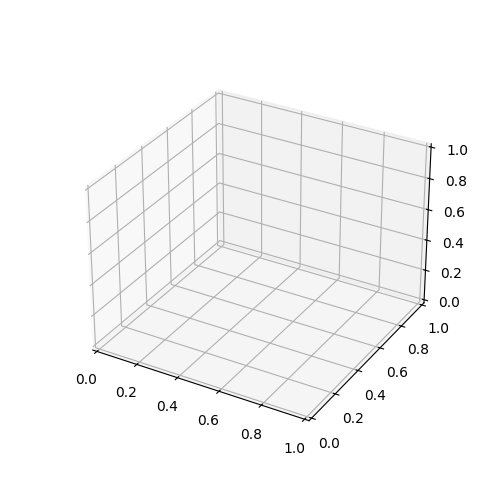

In [35]:
plt.ion()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d(-3,3)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,T[i,:,:],cmap='viridis',label=r"T(x,y,t={:.3f})".format(t[i]))
    ax.legend()
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)
plt.show()